 # Name- Manish D. Thale 

# PROJECT Machine Learning 
# (Supervised ML)

# Dataset - Chronic Kidney Disease Prediction (From Kaggle)
Link - "https://www.kaggle.com/code/milan400/chronic-kidney-disease-prediction"

# 1st Import All neccessary Libraries 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Then load data and  using pandas Function Convert it into DataFrame

In [2]:
df=pd.read_csv('kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# DATA CLEANNING AND EDA PROCESS

# Using other pandas Functions like .isnull().sum() , .value_counts() Find out messy or Null values.

In [3]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
df['id'].value_counts()

0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64

# id column have all unique values so drop that column

In [5]:
del df["id"]

In [6]:
df['age'].value_counts()

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64

# Age Column  contains 2.25% null values so drop only null values at last after Cleanning the data

In [7]:
df["bp"].value_counts()

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64

# it contains 3% null values so replace it with mean

In [8]:
df['bp']=df['bp'].fillna(df['bp'].mean())

In [9]:
df['sg'].value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

# it contain 22 % of null values so replace it with mean

In [10]:
df['sg']=df['sg'].fillna(df['sg'].mean())

In [11]:
df['al'].value_counts()

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64

In [12]:
df['su'].value_counts()

0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64

# replace both the column( su , al ) by mean 

In [13]:

df['su']=df['su'].fillna(df['su'].mean())
df['al']=df['al'].fillna(df['al'].mean())

In [14]:
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

# it contaions 38% null values and datatype is categorical so replace it with mode

In [15]:
 
df.rbc.replace(np.nan,'normal',inplace=True)


In [16]:
df['rbc'].value_counts()

normal      353
abnormal     47
Name: rbc, dtype: int64

In [17]:
df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

# replace null values with mode

In [18]:

df.pc.replace(np.nan,'normal',inplace=True)

In [19]:
df['pc'].value_counts()

normal      324
abnormal     76
Name: pc, dtype: int64

In [20]:

df['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [21]:
df['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

 # for column pcc and ba we have to drop rows after cleaning all the data

In [22]:
df['bgr'].value_counts()

99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name: bgr, Length: 146, dtype: int64

# replace nullvalue by mean

In [23]:
df['bgr']=df['bgr'].fillna(df['bgr'].mean())

In [24]:
df['bu'].value_counts()

46.0     15
25.0     13
19.0     11
40.0     10
50.0      9
         ..
176.0     1
145.0     1
92.0      1
322.0     1
186.0     1
Name: bu, Length: 118, dtype: int64

In [25]:
df['sc'].value_counts()

1.2     40
1.1     24
0.5     23
1.0     23
0.9     22
        ..
3.8      1
12.2     1
9.2      1
13.8     1
0.4      1
Name: sc, Length: 84, dtype: int64

# REPLACE Both Columns('bu', 'sc' ) Null values by mean

In [26]:
df['bu']=df['bu'].fillna(df['bu'].mean())
df['sc']=df['sc'].fillna(df['sc'].mean())

In [27]:
df['sod'].value_counts()

135.0    40
140.0    25
141.0    22
139.0    21
138.0    20
142.0    20
137.0    19
150.0    17
136.0    17
147.0    13
145.0    11
132.0    10
146.0    10
131.0     9
144.0     9
133.0     8
130.0     7
134.0     6
143.0     4
124.0     3
127.0     3
122.0     2
113.0     2
120.0     2
125.0     2
128.0     2
114.0     2
126.0     1
163.0     1
115.0     1
129.0     1
4.5       1
104.0     1
111.0     1
Name: sod, dtype: int64

In [28]:
df['pot'].value_counts()

3.5     30
5.0     30
4.9     27
4.7     17
4.8     16
3.9     14
3.8     14
4.1     14
4.2     14
4.0     14
4.4     14
4.5     13
4.3     12
3.7     12
3.6      8
4.6      7
3.4      5
5.2      5
5.3      4
5.7      4
3.2      3
5.5      3
6.3      3
5.4      3
2.9      3
3.3      3
5.6      2
3.0      2
6.5      2
2.5      2
5.9      2
5.8      2
7.6      1
47.0     1
6.6      1
5.1      1
6.4      1
2.8      1
2.7      1
39.0     1
Name: pot, dtype: int64

# replace both column by mean

In [29]:

df['sod']=df['sod'].fillna(df['sod'].mean())
df['pot']=df['pot'].fillna(df['pot'].mean())

In [30]:
df['hemo'].value_counts()

15.0    16
10.9     8
13.6     7
13.0     7
9.8      7
        ..
6.8      1
8.5      1
7.3      1
12.8     1
17.6     1
Name: hemo, Length: 115, dtype: int64

# replace null values from 'hemo' with mean

In [31]:
df['hemo']=df['hemo'].fillna(df['hemo'].mean())

In [32]:
df['pcv'].value_counts()

41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: pcv, dtype: int64

# Replace messy or noisy values from 'pcv' column by np.nan

In [33]:
df.pcv.replace('\t43',np.nan,inplace=True)
df.pcv.replace('\t?',np.nan,inplace=True)

In [34]:
df.pcv.isnull().sum()

72

# Replace null values from 'pcv' i.e. 18% null values by mean 

# 1st convert all string values to numeric using to_numeric() function

In [35]:
df['pcv']=pd.to_numeric(df['pcv'])

In [36]:
df['pcv']=df['pcv'].fillna(df['pcv'].mean())

In [37]:
df['wc'].value_counts()

9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: wc, Length: 92, dtype: int64

In [38]:
df['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
5.5     8
6.1     8
5.0     8
3.7     8
5.3     7
5.8     7
5.4     7
3.8     7
5.6     6
4.3     6
4.2     6
3.2     5
4.4     5
5.7     5
6.4     5
5.1     5
6.2     5
6.5     5
4.1     5
3.6     4
6.3     4
6.0     4
4.0     3
3.3     3
4       3
3.5     3
2.9     2
3.1     2
2.6     2
2.1     2
2.5     2
2.8     2
3.0     2
2.7     2
5       2
2.3     1
\t?     1
2.4     1
3       1
8.0     1
Name: rc, dtype: int64

# REPLACE Messy values from 'rc' and 'wc' table to np.nan

In [39]:
df.rc.replace('\t?',np.nan,inplace=True)
df.wc.replace('\t?',np.nan,inplace=True)

In [40]:
df['rc']=pd.to_numeric(df['rc'])
df['wc']=pd.to_numeric(df['wc'])

# Replace null values from both the table with mean

In [41]:
df['rc']=df['rc'].fillna(df['rc'].mean())
df['wc']=df['wc'].fillna(df['wc'].mean())

In [42]:
df['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [43]:
df['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

# Replace the messy values from 'dm' table 

In [44]:
df.dm.replace('\tno','no',inplace=True)
df.dm.replace('\tyes','yes',inplace=True)
df.dm.replace(' yes','yes',inplace=True)

In [45]:
df['dm'].value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [46]:
df['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

# Replace messy values from 'cad' column  

In [47]:
df.cad.replace('\tno','no',inplace=True)

In [48]:
df['cad'].value_counts()

no     364
yes     34
Name: cad, dtype: int64

In [49]:
df['appet'].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [50]:
df['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [51]:
df['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [52]:
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

# In this Column ckd -Chronical Kidney Disease

# notckd - Not Chronical kidney Disease

In [53]:
df.classification.replace('ckd\t','ckd',inplace=True)

In [54]:
df["classification"].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

# PLOT HEATMAP TO FIND OUT NULL VALUES OF DATAFRAME

<AxesSubplot:>

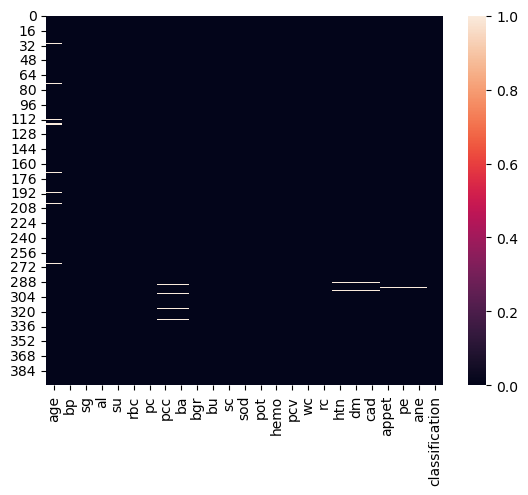

In [55]:
sns.heatmap(df.isnull())

# DROP ALL THE REMAINING NULL VALUES 

In [56]:
df.dropna(inplace=True)
df.shape

(384, 25)

# PLOT HEATMAP TO VERIFY OUR DATA IS CLEAN OR NOT

<AxesSubplot:>

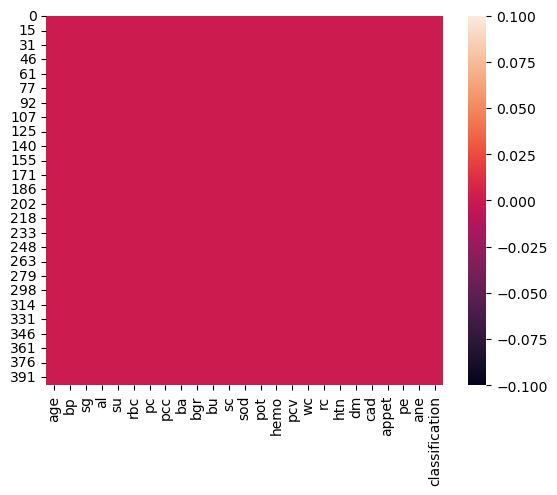

In [57]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='classification', ylabel='count'>

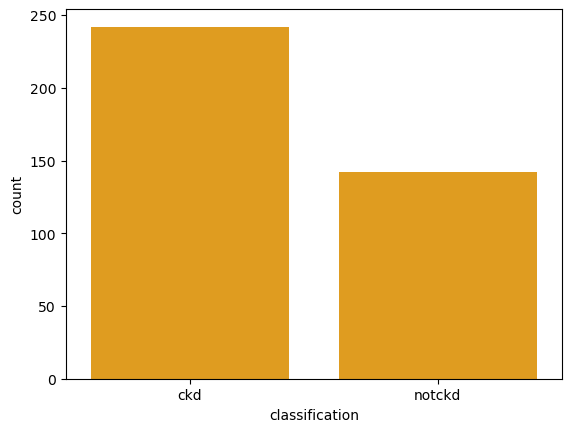

In [58]:
sns.countplot(x='classification',color="orange",data=df)

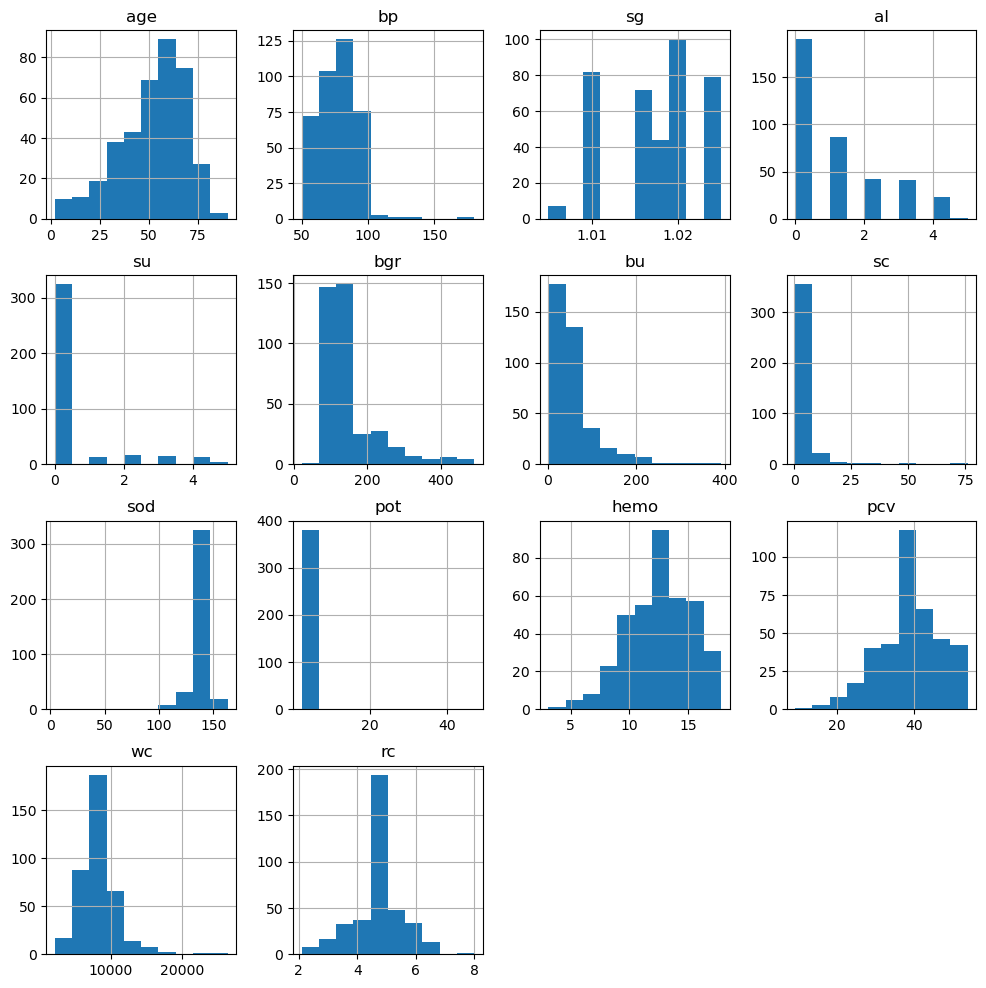

In [59]:
df.hist(figsize=(12,12))
plt.show()

<AxesSubplot:xlabel='age', ylabel='bp'>

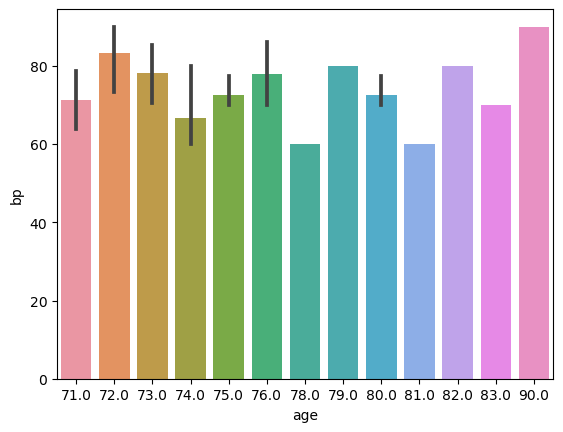

In [60]:
ss=df.loc[(df['age']>70)&(df['bp']<100)]
sns.barplot(x='age',y='bp',data=ss)

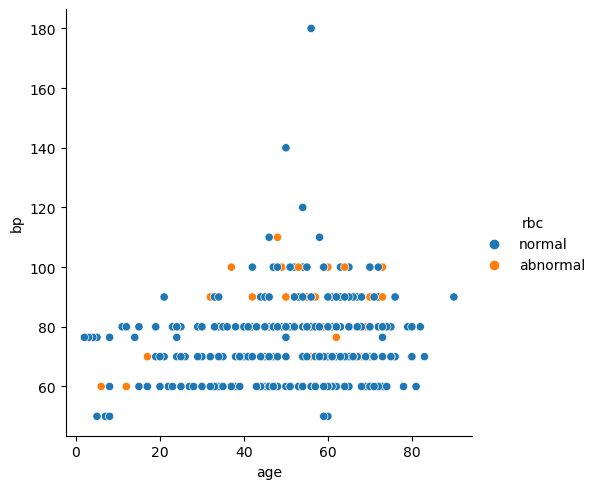

In [61]:
sns.relplot(x='age',y="bp",color='red',hue='rbc',data=df)

<AxesSubplot:xlabel='age', ylabel='Density'>

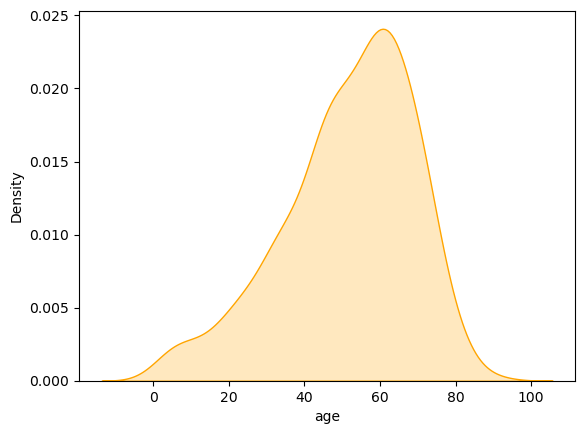

In [62]:
sns.kdeplot(df['age'],color='orange',shade=True)

# SPLIT DATA INTO Numerical column and Categorical Column

In [63]:
Numcol=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        Numcol.append(i)
Numcol  

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [64]:
len(Numcol)

14

In [65]:
catcol=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catcol.append(i)
catcol        

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

# PLOT BOXPLOT FOR NUMERIC VALUES TO FIND OUT OUTLIERS FROM COLUMN

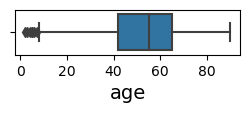

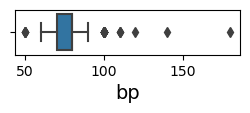

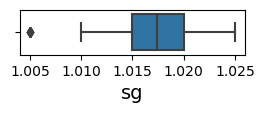

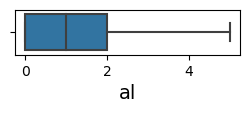

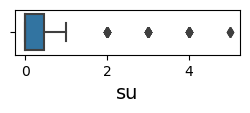

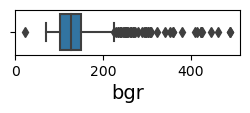

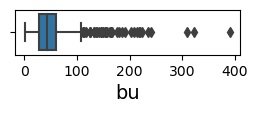

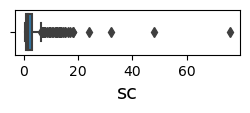

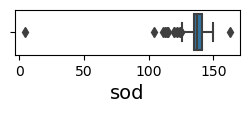

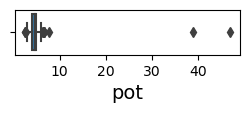

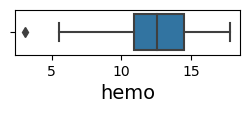

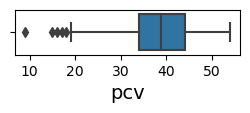

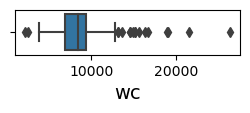

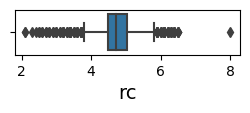

In [66]:
plt.figure()
plotn=1
for i in Numcol:
    if plotn<=14:
        ax=plt.subplot(7,2,plotn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=14)
        plotn=plotn+1
        plt.show()

# WE have outliers in every column except al

# REMOVE IT USING Z SCORE METHOD

In [67]:
f=df[['age','bp','sg','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]

In [68]:
from scipy.stats import zscore
z=abs(zscore(f))

In [69]:
z

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.204771,0.246173,0.483713,0.441058,0.369070,0.432943,0.333115,0.003940,0.001500,1.067193,0.639857,0.237375,0.600923
1,2.589318,1.971393,0.483713,0.441058,0.011121,0.795614,0.403275,0.003940,0.001500,0.456781,0.105896,0.940894,0.015855
2,0.609465,0.246173,1.366250,2.434326,3.629253,0.090421,0.227875,0.003940,0.001500,1.088673,0.975941,0.354628,0.015855
3,0.204771,0.493016,2.291231,0.441058,0.422028,0.029975,0.122926,2.837614,0.742460,0.493951,0.851649,0.667303,0.943215
4,0.030292,0.246173,1.366250,0.441058,0.567662,0.634427,0.298035,0.003940,0.001500,0.345271,0.478772,0.432797,0.111756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.202347,0.246173,0.483713,0.441058,0.117520,0.171014,0.455895,1.339763,0.093506,1.178703,1.012734,0.667303,0.244583
396,0.553729,0.493016,1.408694,0.441058,0.978086,0.533685,0.333115,0.375753,0.394141,1.476064,1.882779,0.237375,1.788721
397,2.298519,0.246173,0.483713,0.441058,0.647099,0.634427,0.438355,0.052696,0.080654,1.215873,1.261318,0.706388,0.838482
398,2.007721,1.232204,1.408694,0.441058,0.461747,0.150866,0.368195,0.266920,0.093506,0.621152,1.509902,0.471881,1.432382


In [70]:
newdf=df[(z<3).all(axis=1)]
newdf

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.000000,...,39.0,7800.0,4.400000,yes,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


# OUR Target is in the form of Categorical

# SO 1st convert all categorical data into numeric 

# Because it is eassy to find out correlation Between Other Features and Target

In [71]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
newdf[catcol]=oe.fit_transform(newdf[catcol])

In [72]:
newdf.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,60.0,90.0,1.015,3.0,0.0,1.0,1.0,0.0,0.0,74.000000,...,39.0,7800.0,4.400000,1.0,1.0,0.0,0.0,1.0,0.0,0.0


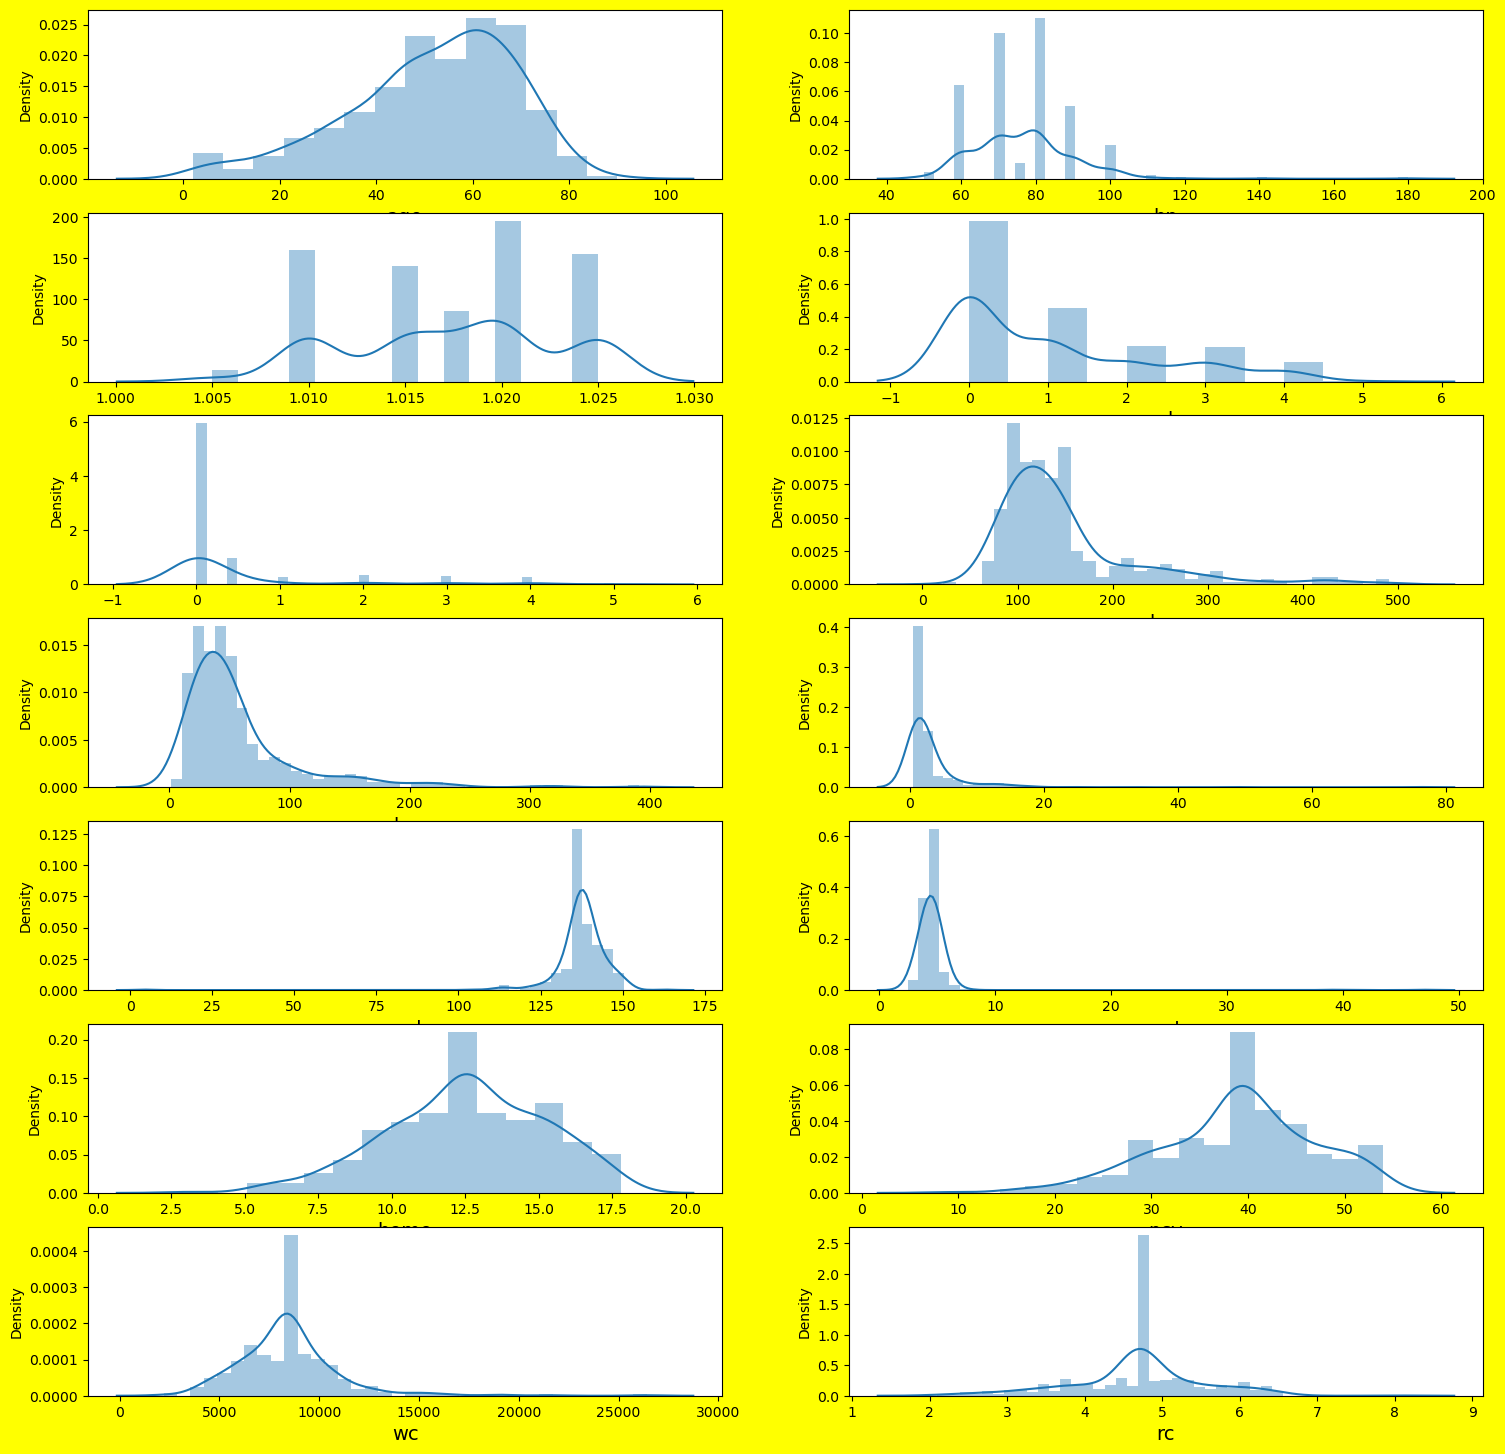

In [73]:
plt.figure(figsize=(18,18),facecolor='yellow')
plotn=1
for i in Numcol:
    if plotn<=14:
        ax=plt.subplot(7,2,plotn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=14)
        plotn=plotn+1


# Find out Skewness

In [74]:
newdf.skew()

age              -0.610550
bp                0.278195
sg               -0.300419
al                1.217996
su                3.040360
rbc              -2.667605
pc               -1.927370
pcc               2.971076
ba                3.996959
bgr               1.748987
bu                1.772027
sc                2.980150
sod              -1.051448
pot              -0.009814
hemo             -0.306164
pcv              -0.398080
wc                0.452920
rc               -0.209005
htn               0.748432
dm                0.882954
cad               3.113080
appet             1.617831
pe                1.749822
ane               2.330257
classification    0.325129
dtype: float64

# FIND OUT CORRELATION OF Features and Target using Heatmap

<AxesSubplot:>

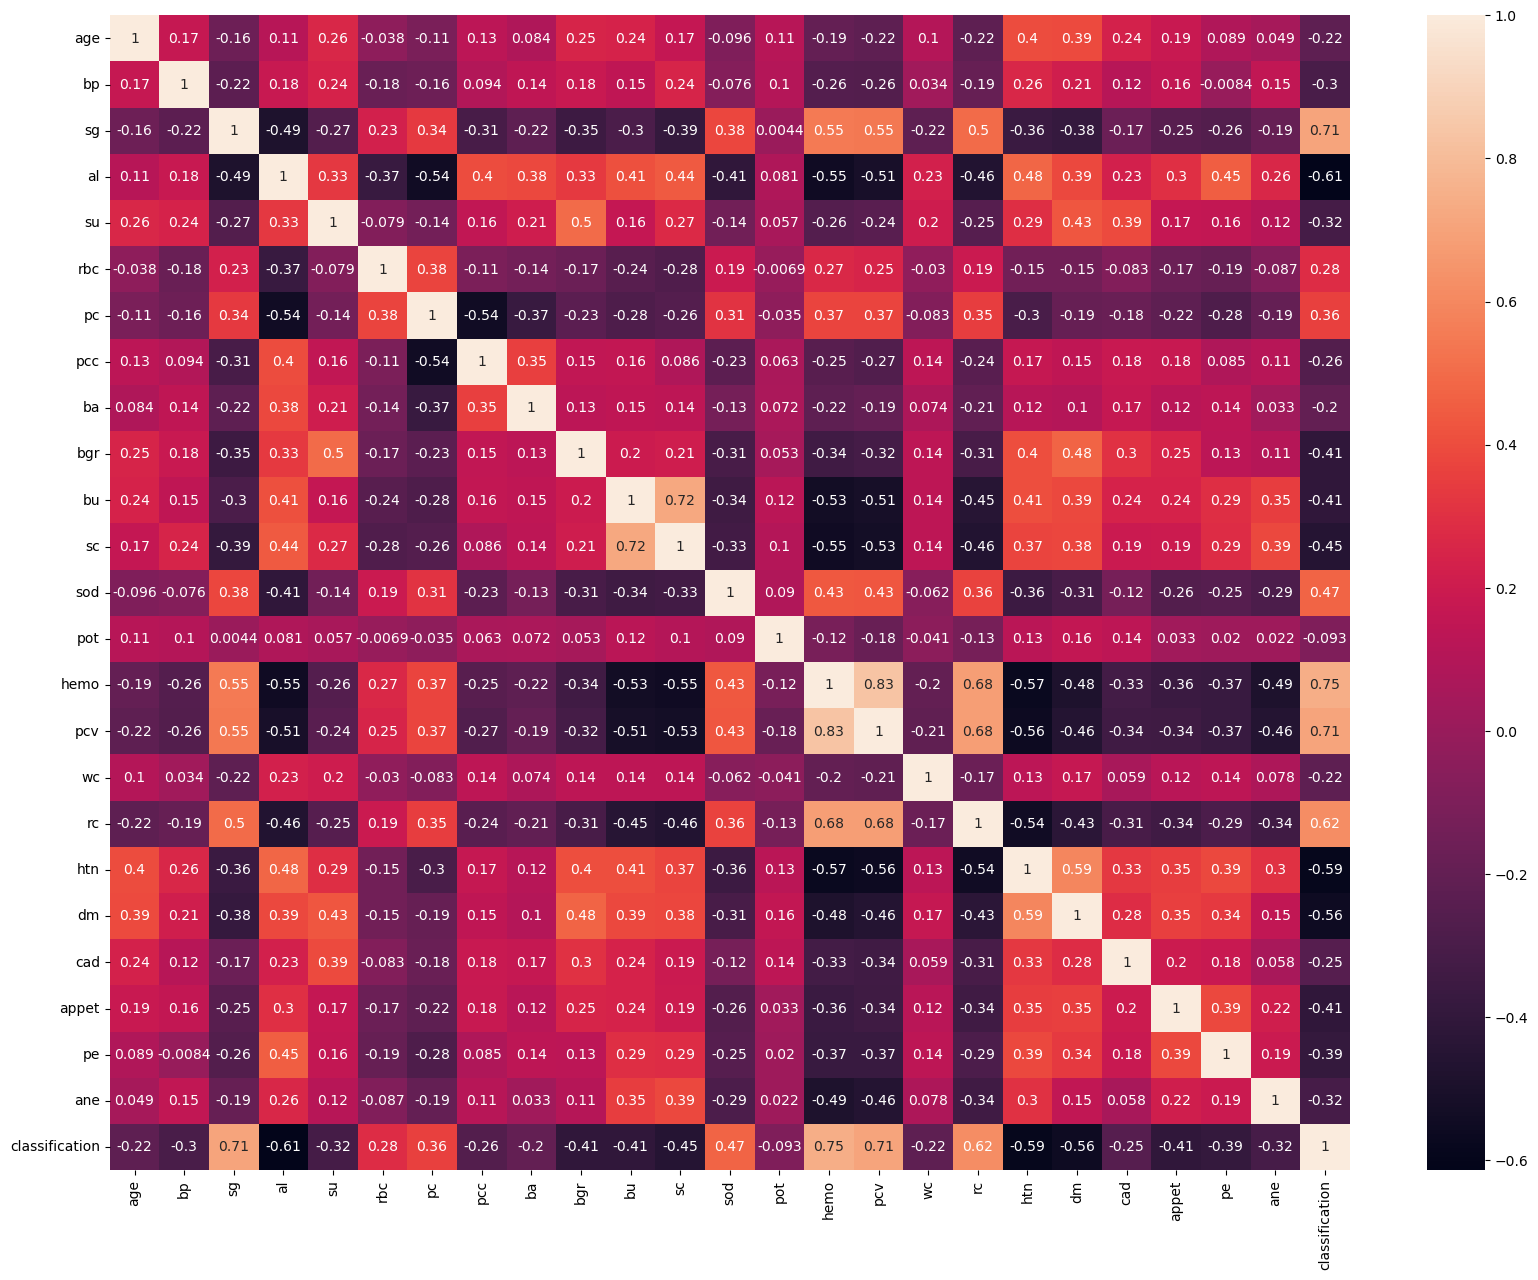

In [75]:
plt.figure(figsize=(20,15))
sns.heatmap(newdf.corr(),annot=True)

# from dataset we conclude that we have skewness in  Column Age, al,su,rbc,pc,pcc,
# ba,bu,sc,sod,htn,dm,cad,appet,pe,ane
# But htn,dm,al are stringly correlated with our target so dont remove skewness from them 

In [76]:
s=['age','su','rbc','pc','pcc','ba','bu','sc','sod','cad','appet','pe','ane']
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
newdf[s]=scaler.fit_transform(newdf[s].values)

In [77]:
newdf.skew()

age              -0.222100
bp                0.278195
sg               -0.300419
al                1.217996
su                1.364572
rbc              -2.667605
pc               -1.927370
pcc               2.971076
ba                3.996959
bgr               1.748987
bu               -0.001674
sc                0.203925
sod               0.116439
pot              -0.009814
hemo             -0.306164
pcv              -0.398080
wc                0.452920
rc               -0.209005
htn               0.748432
dm                0.882954
cad               3.113080
appet             1.617831
pe                1.749822
ane               2.330257
classification    0.325129
dtype: float64

# Split Data into Feature and Target

# Store Features in- x

# Store Target in - y

In [78]:
x=newdf.drop("classification",axis=1)
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.254405,80.0,1.020,1.0,-0.532545,0.334428,0.426401,-0.306351,-0.237171,121.000000,...,15.4,44.0,7800.0,5.200000,1.0,1.0,-0.294647,-0.478634,-0.455129,-0.371547
1,-2.144444,50.0,1.020,4.0,-0.532545,0.334428,0.426401,-0.306351,-0.237171,148.036517,...,11.3,38.0,6000.0,4.707435,0.0,0.0,-0.294647,-0.478634,-0.455129,-0.371547
3,-0.254405,70.0,1.005,4.0,-0.532545,0.334428,-2.345208,3.264226,-0.237171,117.000000,...,11.2,32.0,6700.0,3.900000,1.0,0.0,-0.294647,2.089277,2.197177,2.691450
4,-0.074075,80.0,1.010,2.0,-0.532545,0.334428,0.426401,-0.306351,-0.237171,106.000000,...,11.6,35.0,7300.0,4.600000,0.0,0.0,-0.294647,-0.478634,-0.455129,-0.371547
5,0.493020,90.0,1.015,3.0,-0.532545,0.334428,0.426401,-0.306351,-0.237171,74.000000,...,12.2,39.0,7800.0,4.400000,1.0,1.0,-0.294647,-0.478634,2.197177,-0.371547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.173252,80.0,1.020,0.0,-0.532545,0.334428,0.426401,-0.306351,-0.237171,140.000000,...,15.7,47.0,6700.0,4.900000,0.0,0.0,-0.294647,-0.478634,-0.455129,-0.371547
396,-0.601096,70.0,1.025,0.0,-0.532545,0.334428,0.426401,-0.306351,-0.237171,75.000000,...,16.5,54.0,7800.0,6.200000,0.0,0.0,-0.294647,-0.478634,-0.455129,-0.371547
397,-1.989836,80.0,1.020,0.0,-0.532545,0.334428,0.426401,-0.306351,-0.237171,100.000000,...,15.8,49.0,6600.0,5.400000,0.0,0.0,-0.294647,-0.478634,-0.455129,-0.371547
398,-1.807395,60.0,1.025,0.0,-0.532545,0.334428,0.426401,-0.306351,-0.237171,114.000000,...,14.2,51.0,7200.0,5.900000,0.0,0.0,-0.294647,-0.478634,-0.455129,-0.371547


In [79]:
y=newdf["classification"]
y

0      0.0
1      0.0
3      0.0
4      0.0
5      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: classification, Length: 338, dtype: float64

# Split Data For Training AND Testing

In [80]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [81]:
from sklearn.metrics import classification_report, accuracy_score

In [82]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Train ACCU :{train}\n Test ACCU: {test}")
    print(classification_report(ytest,ypred))
    return model

#  Apply LogisticRegression() and find out accuracy

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr=mymodel(LogisticRegression())

Train ACCU :1.0
 Test ACCU: 0.9411764705882353
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        62
         1.0       0.93      0.93      0.93        40

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102



In [85]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [86]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(lr,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.9411764705882353

 Cross validation Score: 0.9705004389815628

 R2 Score - Cross Validation score is -0.029323968393327515


#  Apply NeighborsClassifier and find out accuracy

In [87]:
from sklearn.neighbors  import KNeighborsClassifier

In [88]:
knn=mymodel(KNeighborsClassifier(n_neighbors=5))

Train ACCU :0.8135593220338984
 Test ACCU: 0.7254901960784313
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        62
         1.0       0.63      0.72      0.67        40

    accuracy                           0.73       102
   macro avg       0.72      0.73      0.72       102
weighted avg       0.74      0.73      0.73       102



In [89]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [90]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(knn,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7254901960784313

 Cross validation Score: 0.7074187884108867

 R2 Score - Cross Validation score is 0.01807140766754467


#  Apply DecisionTreeClassifier and find out accuracy

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc = mymodel(DecisionTreeClassifier())

Train ACCU :1.0
 Test ACCU: 0.9607843137254902
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        62
         1.0       0.91      1.00      0.95        40

    accuracy                           0.96       102
   macro avg       0.95      0.97      0.96       102
weighted avg       0.96      0.96      0.96       102



In [92]:
dtc1=DecisionTreeClassifier()

In [93]:
dtc1.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [94]:
from sklearn.model_selection import cross_val_score

print(ac)
cv_score=(cross_val_score(dtc,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.9607843137254902

 Cross validation Score: 0.9733977172958737

 R2 Score - Cross Validation score is -0.01261340357038343


# Apply SVM Algorithm and find out Accuracy

In [95]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# Hard margin
l=mymodel(LinearSVC(random_state=1))

Train ACCU :0.4449152542372881
 Test ACCU: 0.4215686274509804
              precision    recall  f1-score   support

         0.0       1.00      0.05      0.09        62
         1.0       0.40      1.00      0.58        40

    accuracy                           0.42       102
   macro avg       0.70      0.52      0.33       102
weighted avg       0.77      0.42      0.28       102



In [96]:
LinSVC=LinearSVC()

In [97]:
LinSVC.fit(xtrain,ytrain)
ypred=LinSVC.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [98]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(LinSVC,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.6176470588235294

 Cross validation Score: 0.5768217734855136

 R2 Score - Cross Validation score is 0.04082528533801588


In [99]:
# soft margin
linsvc=mymodel(LinearSVC(random_state=1,C=0.8))

Train ACCU :0.4449152542372881
 Test ACCU: 0.4215686274509804
              precision    recall  f1-score   support

         0.0       1.00      0.05      0.09        62
         1.0       0.40      1.00      0.58        40

    accuracy                           0.42       102
   macro avg       0.70      0.52      0.33       102
weighted avg       0.77      0.42      0.28       102



In [100]:
linsvc=LinearSVC(random_state=1,C=0.8)

In [101]:
linsvc.fit(xtrain,ytrain)
ypred=linsvc.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [102]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(linsvc,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.4215686274509804

 Cross validation Score: 0.5622036874451273

 R2 Score - Cross Validation score is -0.14063505999414688


# Apply Naive Bayes all Algorithm to find Accuracy MultinomialNB,BernoulliNB,GaussianNB

In [103]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [104]:
bnb=mymodel(BernoulliNB())

Train ACCU :0.9279661016949152
 Test ACCU: 0.9117647058823529
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92        62
         1.0       0.83      0.97      0.90        40

    accuracy                           0.91       102
   macro avg       0.91      0.92      0.91       102
weighted avg       0.92      0.91      0.91       102



In [105]:
bnb.fit(xtrain,ytrain)
ypred=bnb.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [106]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(bnb,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.9117647058823529

 Cross validation Score: 0.9260755048287972

 R2 Score - Cross Validation score is -0.01431079894644427


In [107]:
gnb=mymodel(GaussianNB())

Train ACCU :0.9491525423728814
 Test ACCU: 0.9509803921568627
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        62
         1.0       0.91      0.97      0.94        40

    accuracy                           0.95       102
   macro avg       0.95      0.96      0.95       102
weighted avg       0.95      0.95      0.95       102



In [108]:
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [109]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(gnb,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.9509803921568627

 Cross validation Score: 0.9526338893766463

 R2 Score - Cross Validation score is -0.001653497219783584


# Apply Boosting Algorithm like GradientBoostingClassifier , XGBClassifier , AdaBoostClassifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=mymodel(GradientBoostingClassifier(n_estimators=2))

Train ACCU :0.9830508474576272
 Test ACCU: 0.9705882352941176
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        62
         1.0       1.00      0.93      0.96        40

    accuracy                           0.97       102
   macro avg       0.98      0.96      0.97       102
weighted avg       0.97      0.97      0.97       102



In [111]:
gbr.fit(xtrain,ytrain)
ypred=gbr.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [112]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(gbr,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.9901960784313726

 Cross validation Score: 0.9823529411764707

 R2 Score - Cross Validation score is 0.007843137254901933


In [113]:
from xgboost import XGBClassifier
xgb=mymodel(XGBClassifier(random_state=1,reg_alpha=1))

Train ACCU :1.0
 Test ACCU: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



In [114]:
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [115]:
from sklearn.model_selection import cross_val_score
ac=ac*100
print(ac)
cv_score=(cross_val_score(xgb,x,y,cv=5).mean())*100
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

100.0

 Cross validation Score: 97.93239683933275

 R2 Score - Cross Validation score is 2.0676031606672467


In [116]:
from sklearn.ensemble import AdaBoostClassifier
ad=mymodel(AdaBoostClassifier(random_state=1))

Train ACCU :1.0
 Test ACCU: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



In [117]:
ad.fit(xtrain,ytrain)
ypred=ad.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [118]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(ad,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

1.0

 Cross validation Score: 0.9851185250219491

 R2 Score - Cross Validation score is 0.014881474978050924


In [119]:
d={'Accuracy':[0.94,0.72,0.96,0.48,0.42,0.91,0.950,0.9705,0.1,0.1],'CV Score':[0.97,0.70,0.97,0.57,0.56,0.92,0.9520,0.9763,0.9793,0.98]}

In [120]:
D=pd.DataFrame(d)

In [121]:
D

,Accuracy,CV Score
0,0.9400,0.9700
1,0.7200,0.7000
2,0.9600,0.9700
3,0.4800,0.5700
4,0.4200,0.5600
5,0.9100,0.9200
6,0.9500,0.9520
7,0.9705,0.9763
8,0.1000,0.9793
9,0.1000,0.9800


In [122]:
D['Difference']=(D['Accuracy']-D['CV Score'])

In [123]:
D

,Accuracy,CV Score,Difference
0,0.9400,0.9700,-0.0300
1,0.7200,0.7000,0.0200
2,0.9600,0.9700,-0.0100
3,0.4800,0.5700,-0.0900
4,0.4200,0.5600,-0.1400
5,0.9100,0.9200,-0.0100
6,0.9500,0.9520,-0.0020
7,0.9705,0.9763,-0.0058
8,0.1000,0.9793,-0.8793
9,0.1000,0.9800,-0.8800


In [147]:
# here we got  less difference in GaussianNB i.e.-0.002 
# so Moving towards hyperparameter Tunning of Gaussian 

In [148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [149]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


In [150]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(xtrain, ytrain)
print(nbModel_grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=4.328761281083061e-09)


In [153]:
nbModel_grid.best_score_

0.9450354609929079

In [151]:
ypred = nbModel_grid.predict(xtest)
print(ypred)

[0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0.]


In [152]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred), ": is the accuracy score")


0.9607843137254902 : is the accuracy score


In [146]:
from sklearn.model_selection import cross_val_score
ac=accuracy_score(ytest,ypred)
print(ac)
cv_score=(cross_val_score(nbModel_grid,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)
#Difference of R2 score minus CV score
difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.9607843137254902
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Cross validation Score: 0.9467076382791924

 R2 Score - Cross Validation score is 0.01407667544629787
